# Quickstart

In `utils.py` the `SinumerikTraceHandler` provides fuctionalities for reading XML files and returning a `pandas.DataFrame` object:

In [1]:
from utils import SinumerikTraceHandler

In [2]:
path = './data/220124_49514579_GL_X_F6000.xml'
handler = SinumerikTraceHandler()
df = handler.read_xml(path)
df.head()

,time,"/Nck/!SD/nckServoDataCmdPos2ndEnc64 [u1, 1]","/Nck/!SD/nckServoDataContDev64 [u1, 1]","/Nck/!SD/nckServoDataActPos2ndEnc64 [u1, 1]","/Nck/!SD/nckServoDataActPos1stEnc64 [u1, 1]","/Nck/!SD/nckServoDataActCurr64 [u1, 1]",sessionName,start_time,equipment,meas_type_id
0,0.000,-360.0,-0.003016,-359.996982,-760.985794,-0.856018,220124_49514579_GL_X_F6000,2024-01-22T12:19:28.564Z,49514579,F6000
1,0.002,-360.0,-0.002509,-359.997490,-760.986218,-0.839233,220124_49514579_GL_X_F6000,2024-01-22T12:19:28.564Z,49514579,F6000
2,0.004,-360.0,-0.002012,-359.997988,-760.986624,-0.812378,220124_49514579_GL_X_F6000,2024-01-22T12:19:28.564Z,49514579,F6000
3,0.006,-360.0,-0.001543,-359.998457,-760.987005,-0.782166,220124_49514579_GL_X_F6000,2024-01-22T12:19:28.564Z,49514579,F6000
4,0.008,-360.0,-0.001123,-359.998877,-760.987344,-0.755310,220124_49514579_GL_X_F6000,2024-01-22T12:19:28.564Z,49514579,F6000


<ins>The dataframe contains the raw time series data:<ins>
* /Nck/!SD/nckServoDataCmdPos2ndEnc64 [u1, 1] --> commanded position setpoint, calculated in the numeric control
* /Nck/!SD/nckServoDataContDev64 [u1, 1] --> actual contour deviation (the smaller, the better) calculated in the umeric control
* /Nck/!SD/nckServoDataActPos2ndEnc64 [u1, 1] --> actual position of the second position encoder (absolute measurement system, i.e. glass scale)
* /Nck/!SD/nckServoDataActPos1stEnc64 [u1, 1] --> actual position of the first position encoder (relative measurement system, i.e. rotary encoder of the electric motor)
* /Nck/!SD/nckServoDataActCurr64 [u1, 1] --> actual motor current
    
<img src="figures/schematic_feed drive.png" alt="isolated" width="800"/>

<ins>The signals are named by the numeric control. Note the numbers in the brackets, that indicate the axis:<ins>
* [u1, 1] --> X-axis
* [u1, 2] --> Y-Axis
* [u1, 3] --> Z-Axis
* [u1, 4] --> C-Axis
* [u1, 5] --> A-Axis

<img src="figures/axes.jpg" alt="isolated" width="400"/>   
 
<ins>Furthermore, the dataframe contains all necessary meta data needed to identify the measurement:<ins>
* sessionName --> name of the measurement session (might slightly differ from the filename due to typos)
* start_time --> start time of the measurement
* equipment --> name of the machine
* meas_type_id --> type of excitation that was recorded

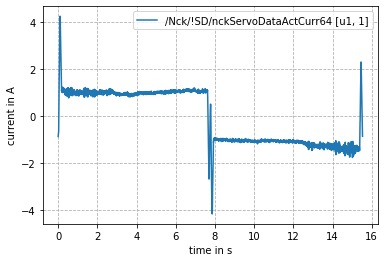

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
df.plot(x='time', y='/Nck/!SD/nckServoDataActCurr64 [u1, 1]', ax=ax)
ax.set(ylabel='current in A', xlabel='time in s')
ax.grid(linestyle='--')
plt.show()